___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

- FRED라고 불리는 Federal Reserve Economic Database의 1970년부터 1989년 사이 전력 및 석유 생산에 대한 산업 생산 지표

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [55]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('data/EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.
- datetime 인덱스에 빈도(feq) 할당

In [56]:
# CODE HERE

df.index.freq='MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [45]:
# DON'T WRITE HERE

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

- 데이터셋 플롯

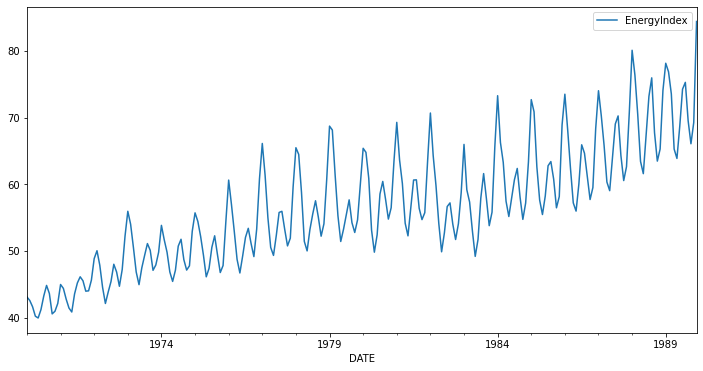

In [57]:
# CODE HERE

df.plot(figsize=(12,6));

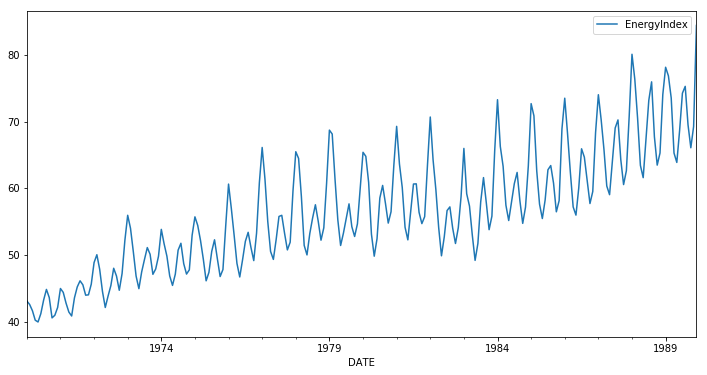

In [3]:
# DON'T WRITE HERE

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

- 12개월 단순 이동 평균 데이터 열

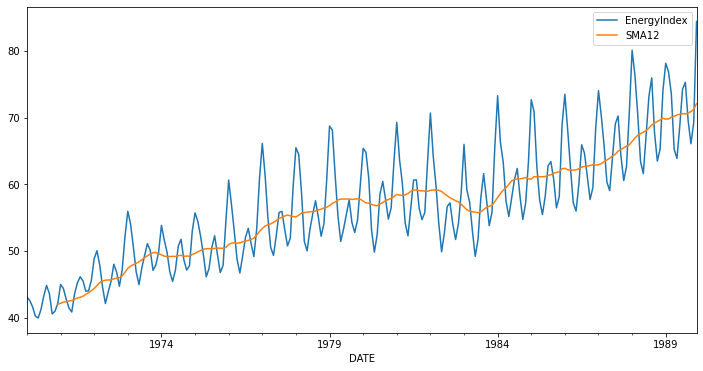

In [58]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(12,6));

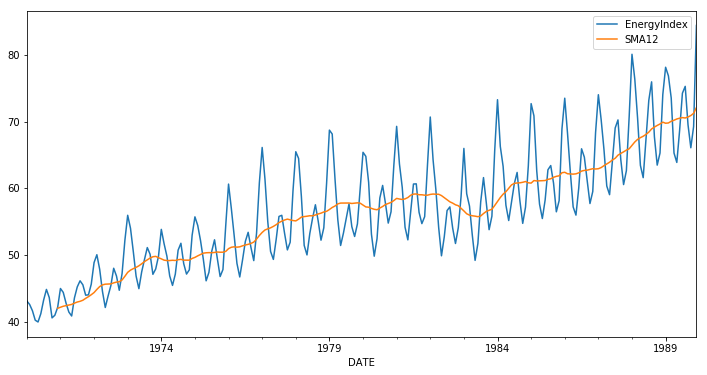

In [4]:
# DON'T WRITE HERE

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

- statsmodels의 SimpleExpSmoothing 함수를 이용해 스팬이 12인 지수 가중 이동 평균이 있는 열 추가 한 후
플롯위에 플롯

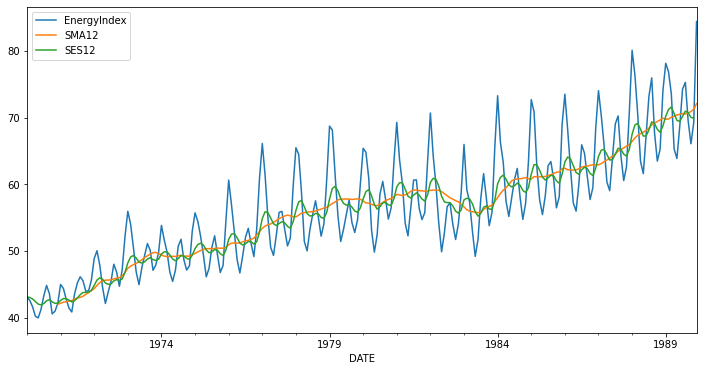

In [59]:
# DON'T FORGET TO PERFORM THE IMPORT!

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha = 2/(span+1)

# df['SES12'] = df['EnergyIndex'].ewm(alpha=alpha, adjust=False).mean()
df['SES12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

df.plot(figsize=(12,6));

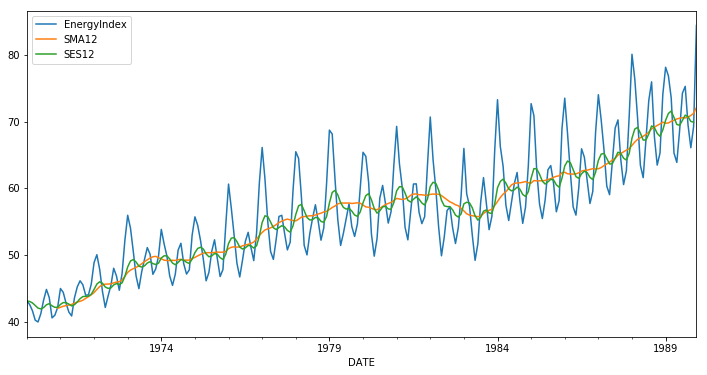

In [5]:
# DON'T WRITE HERE

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

- 홀트-윈터스 계절성 기법을 이용해 곱셈 모형의 삼중 지수 평활법을 이용한 모형을 만들어 데이터프레임에 열로추가하고
결과를 파란선 위에 모두 보이게 플롯

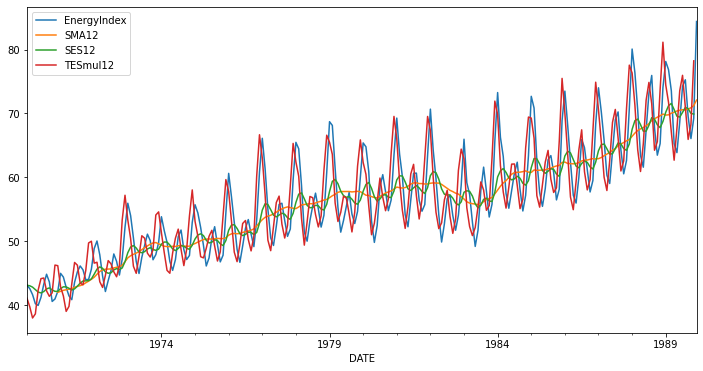

In [64]:
# DON'T FORGET TO PERFORM THE IMPORT!

from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', 
                                      seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot(figsize=(12,6));

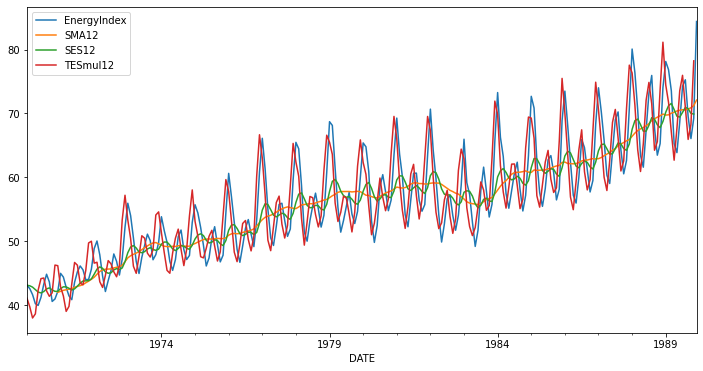

In [66]:
df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

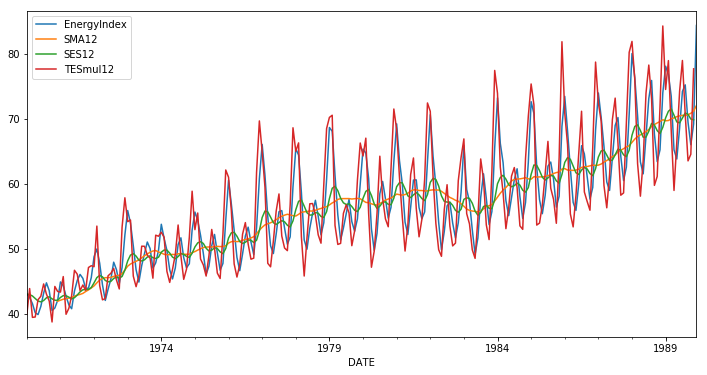

In [6]:
# DON'T WRITE HERE

### OPTIONAL: Plot the same  as above, but for only the first two years.

- 2년의 데이터에 대해서 위와 같은 방법으로 플롯하여 시작 부분에 어땠는지 확인

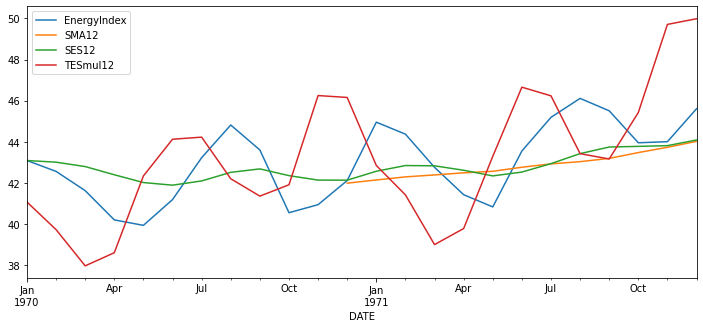

In [65]:
df[:'1971-12-01'].plot(figsize=(12,5));

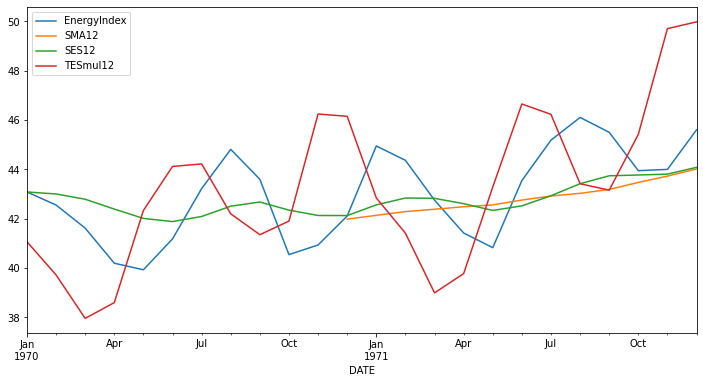

In [67]:
# DON'T WRITE HERE
df.iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

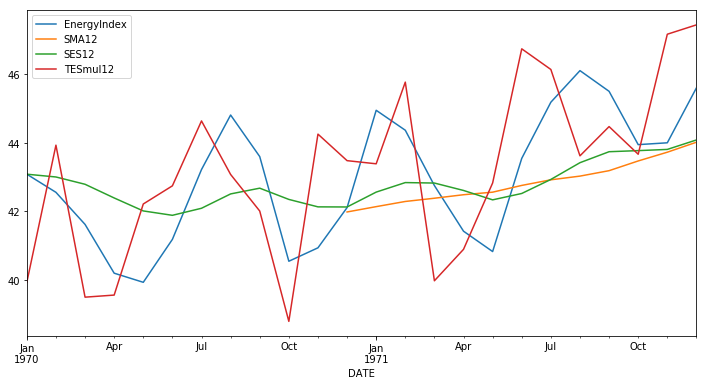

In [7]:
# DON'T WRITE HERE

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?


- 1982년과 1983년에 눈에 띄는 감소가 있었는데, 이동 평균도 이때 감소하는 것이 보임
- 검색을 통해 왜 이런 감소가 나타나는지 알아보기?

- 미국 경기가 불황이었음

## Great job!